# Toy Problem for GMVR

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
from numpy import *
import numpy as np
from positive import *
from matplotlib.pyplot import *

(positive)>> Applying custom matplotlib settings.


### 2D Example with noise 

In [2]:
################################################################################
h = 3
Q = 25
x = h*linspace(-1,1,Q) 
y = h*linspace(-1,1,Q) 
X,Y = meshgrid(x,y)

# Optionally add noise to domain
# X += np.random.random( X.shape )-0.5
# Y += np.random.random( X.shape )-0.5

zfun = lambda xx,yy: 50 + (1.0 + (xx+0.5)*(yy+0.2) - 0.01*xx*xx) / ( 0.9 + xx**2 + yy**2 )
numerator_symbols, denominator_symbols = ['01','0','1'], ['00','11'] 

# zfun = lambda xx,yy: 50 + (1.0 + 2*xx*yy - (xx+0.1)*(yy+0.2)) 
# numerator_symbols, denominator_symbols = ['01','0','1'], ['K'] 

np.random.seed(42)
ns = 0.1*(np.random.random( X.shape )-0.5)
Z = zfun(X,Y) + ns
Z_validation = []
for k in range(500):
    ns = 0.1*(np.random.random( X.shape )-0.5)
    Z_validation.append( zfun(X,Y) + ns )
    
domain,scalar_range = ndflatten( [X,Y], Z )
################################################################################

### Use Greedy Algorithm -- GMVR

In [3]:
star = gmvrfit( domain, scalar_range, verbose=True, tol=0.1 )

(gmvrfit)>> Now working deg = 1
&& The estimator has changed by -inf
&& Degree tempering will continue.
&& The current boundary is [('1', True)]
&& The current estimator value is 0.961341

(gmvrfit)>> Now working deg = 2
&& The estimator has changed by -0.888200
&& Degree tempering will continue.
&& The current boundary is [('01', True), ('00', True), ('11', True), ('00', False), ('11', False), ('1', True), ('0', True)]
&& The current estimator value is 0.073141

(gmvrfit)>> Now working deg = 3
&& The estimator has changed by 0.000000
&& Degree tempering will continue.
&& The current boundary is [('01', True), ('00', True), ('11', True), ('00', False), ('11', False), ('1', True), ('0', True)]
&& The current estimator value is 0.073141

(gmvrfit)>> Now working deg = 4
&& The estimator has changed by -0.000404
&& Degree tempering has completed becuase the estimator has changed by |-0.000404| < 0.010000. The results of the last iteration will be kept.
&& The Final boundary is [('01', True

/Users/book/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1168: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if np.any(self._markerfacecolor != fc):


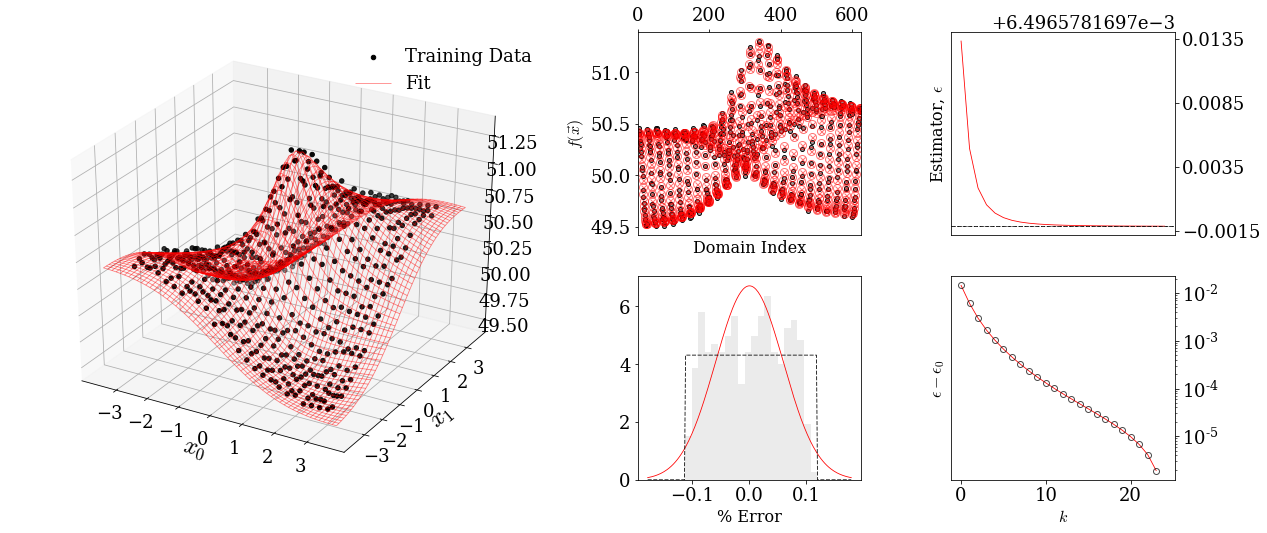

In [4]:
star.plot()
savefig('/Users/book/KOALA/positive_dev/docs/mvfits_paper/fig/issue3_summary.pdf',pad_inches=0, bbox_inches='tight')

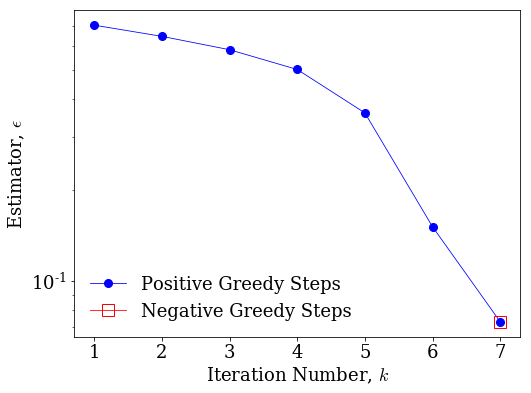

In [5]:
# Plot convergence of greedy process
fig = star.bin['ngreedy_result'].plot()
title('')
xlabel('Iteration Number, $k$',size=18)
ylabel(r'Estimator, $\epsilon$',size=18)
savefig('/Users/book/KOALA/positive_dev/docs/mvfits_paper/fig/issue3_pgreedy.pdf',pad_inches=0, bbox_inches='tight')

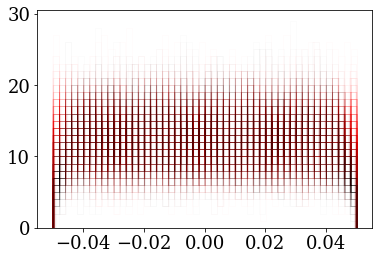

In [6]:

counts = []
counts0 = []
N = 50
for k in range(len(Z_validation)):

    domain,ZZ = ndflatten( [X,Y], Z_validation[k] )
    domain,Z0 = ndflatten( [X,Y], zfun(X,Y) )
    res0 = Z0 - ZZ
    res = star.eval(star.domain) - ZZ

    c,bins,other = hist(res0,N,histtype='step',color='r',alpha=0.01)
    counts.append(c)  
    c,bins0,other = hist(res,bins=bins,histtype='step',color='k',alpha=0.01)
    counts0.append(c)

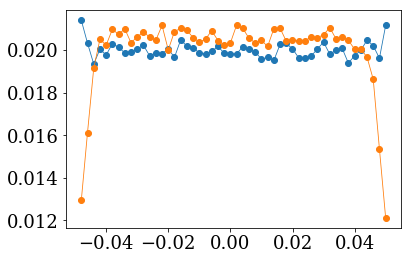

In [7]:
# plot(sum(counts)/len(counts),'-o')
a = sum(counts,axis=0)/sum(sum(counts,axis=0))
b = sum(counts0,axis=0)/sum(sum(counts0,axis=0))

plot( bins[1:], sum(counts,axis=0)/sum(sum(counts,axis=0)), '-o' )
plot( bins[1:], sum(counts0,axis=0)/sum(sum(counts0,axis=0)), '-o' )

0.994610867251
10


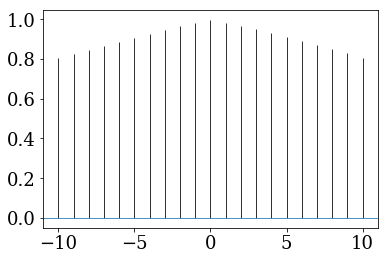

In [8]:
vals = xcorr(a,b,normed=True)
print max(vals[1])
print argmax(vals[1])

### Notes

 * The greedy tolerance is the sole hyper, and has direct impact on which basis symbols are selected.
 * The negative greedy tolerance is a function of the late stage behavior of the greedy tolerance, and may result in a representation error slightly larger than the input tolerance
 * the accuracy of the fit may be framed as how well the model residuals recover the input noise distribution; in this case the "match" is 0.994015838784

In [9]:
print star.__str_latex__()

f(\vec{x}) \; &= \; 5.02327690e+01 \; + 0.40868709 \; \frac{   5.2204e-01\,x0 \; + \; (-6.3185e-01)\,{x0}^{2} \; + \; (2.6267e+00)\,x0\,x1 \; + \; (1.3229e+00)\,x1 \; + \; (-6.2985e-01)\,{x1}^{2} \; + \; (2.3783e+00)  }{ 1 \; + \;   -1.0604e+00\,{x0}^{2} \; + \; (-1.0667e+00)\,{x1}^{2} }


$
f(\vec{x}) \; = \; 5.02408308e+01 \; + 0.40781196 \; \frac{   5.2285e-01\,x0 \; + \; (-6.0155e-01)\,{x0}^{2} \; + \; (2.6306e+00)\,x0\,x1 \; + \; (1.3250e+00)\,x1 \; + \; (-6.5200e-01)\,{x1}^{2} \; + \; (2.3632e+00)  }{ 1 \; + \;   -1.0597e+00\,{x0}^{2} \; + \; (-1.0660e+00)\,{x1}^{2} }
$

In [10]:
print star.__str__()

f = lambda x0,x1: 5.02327690e+01  +  4.08687092e-01 * (  5.22040531e-01*(x0) + -6.31846320e-01*(x0*x0) + 2.62667238e+00*(x0*x1) + 1.32291203e+00*(x1) + -6.29847437e-01*(x1*x1) + 2.37830672e+00 ) / ( 1.0 +  1.06042339e+00*(x0*x0) + 1.06672305e+00*(x1*x1) )


In [11]:
star.bin.keys()

['pgreedy_result', 'ngreedy_result']

In [27]:
print mean( star.scalar_range )
print std( star.scalar_range )
print star.numerator_symbols
print star.denominator_symbols
print star.numerator_coeffs * std( star.scalar_range )
print star.denominator_coeffs 

50.2327689793
0.40868709196
['0', '00', '01', '1', '11', 'K']
['00', '11']
[ 0.21335123 -0.25822744  1.0734871   0.54065707 -0.25741052  0.97198326]
[-1.06042339 -1.06672305]
